In [7]:
import pandas as pd

xray_filtered_piranose_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/carbovault/all_monossacharide_df_without_missing.csv', header=None, sep=';',
                                        names = ['sugar','iupac_name', 'puck.phi_graus', 'puck.theta_graus', 'entry_id','entry_resolution', 'is_in_cazy', 'type'])
em_piranose_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/EM_piranoses_degrees.csv")
ht2_piranose_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/ht2_piranoses_degrees.csv", header=None,
                        names = ['sugar', 'time', 'puck.qx', 'puck.qy', 'puck.qz', 'puck.phi', 'puck.theta', 'puck.amplitude', 'puck.phi_graus', 'puck.theta_graus'])

#Remove unnamed columns
#xray_filtered_piranose_df = xray_filtered_piranose_df.iloc[:, 1:]
em_piranose_df = em_piranose_df.iloc[:, 1:]

In [57]:
#Get info
# Run script all_pyranoses_get_sugar_info.py for all pyranoses

In [8]:
#Deixar parecido com xray_filtered_piranose_df
em_piranose_df = em_piranose_df[['sugar', 'puck.phi_graus', 'puck.theta_graus']]
ht2_piranose_df = ht2_piranose_df[['sugar', 'puck.phi_graus', 'puck.theta_graus']]

#add entry_id column
em_piranose_df['entry_id'] = em_piranose_df['sugar'].str.split('_').str[0]
ht2_piranose_df['entry_id'] = ht2_piranose_df['sugar'].str.split('_').str[0]
#to upper
em_piranose_df['entry_id'] = em_piranose_df['entry_id'].str.upper()
ht2_piranose_df['entry_id'] = ht2_piranose_df['entry_id'].str.upper()

#add is_in_cazy column with None value
em_piranose_df['is_in_cazy'] = False
ht2_piranose_df['is_in_cazy'] = False

#add iupac_name column with None value
em_piranose_df['iupac_name'] = None
ht2_piranose_df['iupac_name'] = None

In [9]:
#Add method
import pandas as pd

#Prepara coluna pra merge
methods_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/methods.txt", header=None, names = ['entry_filename', 'method'], sep=',')
methods_df['entry_filename'] = methods_df['entry_filename'].str.replace('.cif', '')
methods_df['entry_filename'] = methods_df['entry_filename'].str.upper()

#Merge
em_piranose_df = em_piranose_df.merge(methods_df, how='left', left_on='entry_id', right_on='entry_filename')
ht2_piranose_df = ht2_piranose_df.merge(methods_df, how='left', left_on='entry_id', right_on='entry_filename')

In [10]:
#Add type
import pandas as pd

#Prepara coluna pra merge
entry_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/carbovault/entry_info.csv', header=None, sep=';',
                       names=['entry_id', 'dep_date', 'status_code', 'method', 'title', 'keywords', 'other_keywords', 'type'])

entry_df = entry_df[['entry_id', 'type']]

#Merge
em_piranose_df = em_piranose_df.merge(entry_df, how='left', left_on='entry_id', right_on='entry_id')
ht2_piranose_df = ht2_piranose_df.merge(entry_df, how='left', left_on='entry_id', right_on='entry_id')

In [11]:
#Add resolution

#Prepara coluna pra merge
res_df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/resolution_all.csv', names=['entry_id', 'entry_resolution'], sep=';')

#Merge
em_piranose_df = em_piranose_df.merge(res_df, how='left', left_on='entry_id', right_on='entry_id')
ht2_piranose_df = ht2_piranose_df.merge(res_df, how='left', left_on='entry_id', right_on='entry_id')

In [12]:
#Ordena as colunas
em_piranose_df = em_piranose_df[['sugar', 'iupac_name', 'puck.phi_graus', 'puck.theta_graus', 'entry_id', 'entry_resolution', 'is_in_cazy', 'type', 'method']]
ht2_piranose_df = ht2_piranose_df[['sugar', 'iupac_name', 'puck.phi_graus', 'puck.theta_graus', 'entry_id', 'entry_resolution', 'is_in_cazy', 'type', 'method']]

In [13]:
# .dat
import pandas as pd
import numpy as np
names = ['puck.theta', 'puck.phi', 'file.free', 'der_puck.theta', 'der_puck.phi']
glicose_dat = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dinamicas/fes-glicose.dat', delim_whitespace=True, header=None, skiprows=9, names = names)

#To degrees
glicose_dat['puck.phi_graus'] = np.degrees(glicose_dat['puck.phi'])
glicose_dat['puck.theta_graus'] = np.degrees(glicose_dat['puck.theta'])

#Select columns

glicose_dat = glicose_dat[['puck.phi_graus', 'puck.theta_graus', 'file.free']]

/tmp/ipykernel_3146959/1756898958.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  glicose_dat = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dinamicas/fes-glicose.dat', delim_whitespace=True, header=None, skiprows=9, names = names)


In [14]:
#Select glicose

xray_filtered_piranose_df = xray_filtered_piranose_df[xray_filtered_piranose_df['sugar'].str.contains('GLC|BGC', na=False)]

In [15]:
#Conversão
print(xray_filtered_piranose_df[['puck.theta_graus', 'puck.phi_graus']].applymap(type))
xray_filtered_piranose_df['puck.theta_graus'] = pd.to_numeric(xray_filtered_piranose_df['puck.theta_graus'], errors='coerce')
xray_filtered_piranose_df['puck.phi_graus'] = pd.to_numeric(xray_filtered_piranose_df['puck.phi_graus'], errors='coerce')

# Remover linhas com NaN em 'puck.theta_graus' ou 'puck.phi_graus'
xray_filtered_piranose_df = xray_filtered_piranose_df.dropna(subset=['puck.theta_graus', 'puck.phi_graus'])
print(xray_filtered_piranose_df.head())

piranose_df = xray_filtered_piranose_df

/tmp/ipykernel_3146959/4152173333.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(xray_filtered_piranose_df[['puck.theta_graus', 'puck.phi_graus']].applymap(type))


      puck.theta_graus   puck.phi_graus
1      <class 'float'>  <class 'float'>
2      <class 'float'>  <class 'float'>
13     <class 'float'>  <class 'float'>
15     <class 'float'>  <class 'float'>
26     <class 'float'>  <class 'float'>
...                ...              ...
34342  <class 'float'>  <class 'float'>
34356  <class 'float'>  <class 'float'>
34361  <class 'float'>  <class 'float'>
34369  <class 'float'>  <class 'float'>
34374  <class 'float'>  <class 'float'>

[7074 rows x 2 columns]
            sugar iupac_name  puck.phi_graus  puck.theta_graus entry_id  \
1   6zho_GLC_4663     D-Glcp      124.039117          3.192464     6ZHO   
2   6xql_GLC_2019     D-Glcp      185.981241         23.141536     6XQL   
13  2wt1_BGC_2348     D-Glcp      312.326055         11.052986     2WT1   
15  5mtt_GLC_5943     D-Glcp      313.829783          6.478548     5MTT   
26  5c8l_GLC_3073     D-Glcp       76.045594        158.812442     5C8L   

    entry_resolution  is_in_cazy            

/home/douglas/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


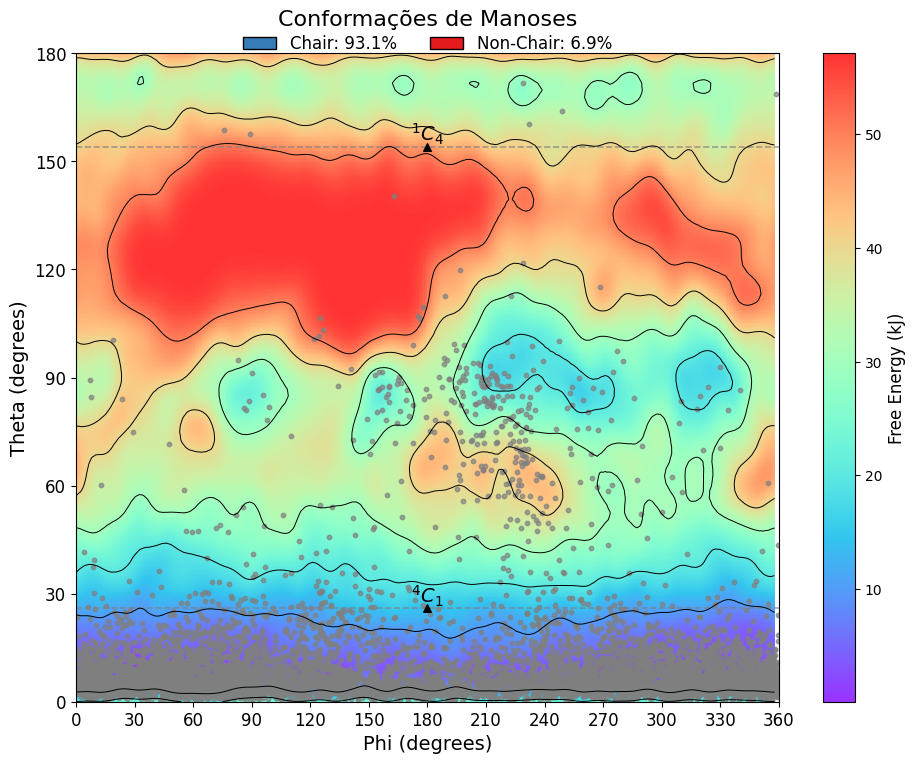

In [16]:
# Plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.interpolate import griddata

# Converter colunas de manose_dat para numéricas (caso necessário)
glicose_dat['puck.theta_graus'] = pd.to_numeric(glicose_dat['puck.theta_graus'], errors='coerce')
glicose_dat['puck.phi_graus'] = pd.to_numeric(glicose_dat['puck.phi_graus'], errors='coerce')
glicose_dat['file.free'] = pd.to_numeric(glicose_dat['file.free'], errors='coerce')

# Remover linhas com valores inválidos
glicose_dat = glicose_dat.dropna(subset=['puck.theta_graus', 'puck.phi_graus', 'file.free'])

# Criar uma grade para o fundo
x = glicose_dat['puck.phi_graus']
y = glicose_dat['puck.theta_graus']
z = glicose_dat['file.free']

# Definir os limites e criar a malha
xi = np.linspace(0, 360, 500)  # Resolução no eixo X
yi = np.linspace(0, 180, 500)  # Resolução no eixo Y
xi, yi = np.meshgrid(xi, yi)

# Interpolação para preencher os valores da grade
zi = griddata((x, y), z, (xi, yi), method='linear')

# Criar a figura
fig, ax = plt.subplots(figsize=(10, 8))

# Adicionar o fundo colorido contínuo
cmap = plt.cm.rainbow  # Escolha um colormap, pode ser 'viridis', 'coolwarm', etc.
im = ax.pcolormesh(xi, yi, zi, shading='auto', cmap=cmap, alpha=0.8)

# Adicionar a barra de cores para referência
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Free Energy (kJ)', fontsize=12)

# Adicionar contornos a cada 10 kJ
contour_levels = np.arange(10, np.nanmax(zi), 10)  # Intervalos de 10 kJ, ignorando NaNs
ax.contour(xi, yi, zi, levels=contour_levels, colors='black', linewidths=0.7)

# Adicionar os dados do gráfico principal (os pontos)
highlight_condition = (piranose_df['puck.theta_graus'] > 26) & (piranose_df['puck.theta_graus'] < 154)

# Pontos destacados (Non-Chair)
ax.scatter(
    piranose_df.loc[highlight_condition, 'puck.phi_graus'], 
    piranose_df.loc[highlight_condition, 'puck.theta_graus'], 
    color='#808080',  # Cor dos pontos destacados
    s=10,
    label='Non-Chair',
    alpha=0.7
)

# Pontos padrão (Chair)
ax.scatter(
    piranose_df.loc[~highlight_condition, 'puck.phi_graus'], 
    piranose_df.loc[~highlight_condition, 'puck.theta_graus'], 
    color='#808080',  # Cor dos pontos padrão
    s=10,
    label='Chair',
    alpha=0.7
)

# Adicionar coordenadas e rótulos
coordinates = [(180, 26, r"$^{4}C_{1}$"),
                (180, 154, r"$^{1}C_{4}$")]

for x, y, label in coordinates:
    ax.axhline(y=y, color='gray', linestyle='--', linewidth=1.2, alpha=0.7, zorder=1)
    ax.scatter(x, y, color='black', s=30, marker='^', zorder=10)
    ax.text(x, y, label, fontsize=14, ha='center', va='bottom', color='black', zorder=10)

# Configurações do gráfico
ax.set_xlim([0, 360])
ax.set_ylim([0, 180])
ax.set_xlabel('Phi (degrees)', fontsize=14)
ax.set_ylabel('Theta (degrees)', fontsize=14)
ax.set_title('Conformações de Glicoses', fontsize=16, pad=20)
ax.set_xticks(range(0, 361, 30))
ax.set_yticks(range(0, 181, 30))
ax.tick_params(axis='both', labelsize=12)

# Remover a grade
ax.grid(False)

# Adicionar a legenda
chair_percentage = len(piranose_df.loc[~highlight_condition]) / len(piranose_df) * 100
non_chair_percentage = len(piranose_df.loc[highlight_condition]) / len(piranose_df) * 100
legend_elements = [
    Patch(facecolor='#377eb8', edgecolor='black', label=f'Chair: {chair_percentage:.1f}%'),
    Patch(facecolor='#e41a1c', edgecolor='black', label=f'Non-Chair: {non_chair_percentage:.1f}%')
]
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.052),
    fontsize=12,
    frameon=False,
    ncol=2
)

plt.tight_layout(pad=2.0)
plt.show()
